<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data exploration and analysis**

We explore a data sample and carry out a basic statistical data analysis.
The data consists in a table containing the brain features computed by means of the FreeSurfer segmentation software for the ABIDE I data cohort.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

# ** Reading the data set**

We have to read a pandas DataFrame table where each of the 915 row corresponds to a different subject and the 424 columns (419 brain features) contain descriptive characteristics of each subjects (e.g. age, IQ, morphometric brain features). 

In [3]:
dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df.size
df.shape
df.head(5)

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_caudalanteriorcingulate_SurfArea,lh_caudalanteriorcingulate_GrayVol,lh_caudalanteriorcingulate_ThickAvg,lh_caudalanteriorcingulate_ThickStd,lh_caudalanteriorcingulate_MeanCurv,...,CC_Mid_Anterior_Volume_mm3,CC_Anterior_Volume_mm3,lh_MeanThickness,rh_MeanThickness,VentricleChoroidVol,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,909,2684,2.918,0.481,0.134,...,788.7,929.8,2.52039,2.52379,42065,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,1,1425,4623,3.046,0.543,0.116,...,907.3,1066.6,2.55533,2.56998,28505,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,1,1205,3940,2.987,0.423,0.104,...,964.2,1104.3,2.64518,2.63160,13383,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,1,1413,4711,2.879,0.587,0.120,...,811.0,1056.7,2.70814,2.72762,6849,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,1,875,2270,2.473,0.475,0.104,...,844.8,1015.4,2.59002,2.61012,73159,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


Adding a feature "Site" which is the acquisition site

In [ ]:
df.FILE_ID
df.FILE_ID[0].split('_')[0]
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df.size
df.shape

(915, 425)

\Dividing the data set in ASD and TD and check their shape


In [ ]:
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]
df_ASD.size
df_TD.shape

(464, 425)

# **# Representing data**
We are going to analize the TD dataset

# **Histograms**

By convention, in this dataset missing values in the FIQ column are indicated as either -9999 or 0 so we mask them 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea4d7387d0>]],
      dtype=object)

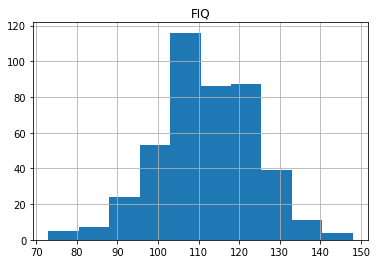

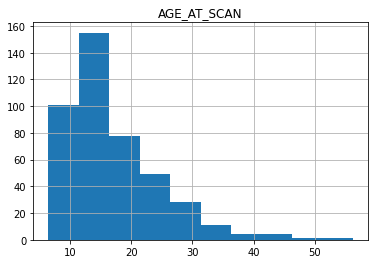

In [ ]:
df_TD[df_TD.FIQ>0].hist('FIQ')
df_TD.hist(['AGE_AT_SCAN'])

# Boxplots
We can make a boxplot representing the age values for each acquisition site.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


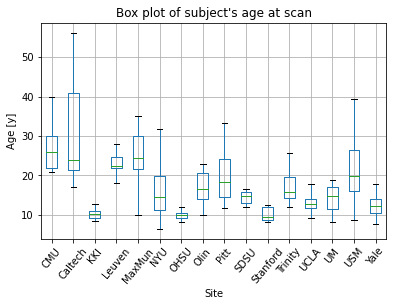

In [ ]:
boxplot = df_TD.boxplot(column=['AGE_AT_SCAN'], by='Site', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('Age [y]')
boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);

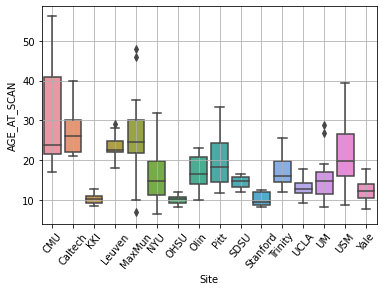

In [ ]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df_TD)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

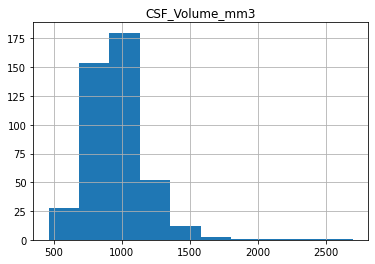

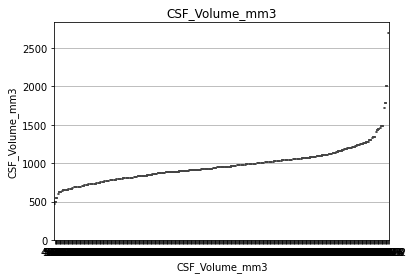

In [ ]:
df_TD[df_TD.CSF_Volume_mm3>0].hist('CSF_Volume_mm3')
df_ASD[df_ASD.CSF_Volume_mm3>0].hist('CSF_Volume_mm3')
sns_boxplot = sns.boxplot(x='CSF_Volume_mm3', y='CSF_Volume_mm3', data=df_TD)
#sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
#sns_boxplot.grid()

# **Basic data analysis**

 First of all we have to check for normality of our data distributions. We can use the scipy.stats.normaltest which test whether a sample differs from a normal distribution. This function tests the null hypothesis that a sample comes from a normal distribution

 In case the assumption of normality is not satisfied for a specific sample, non parametric tests to compare two samples can be carried out: • Wilcoxon-Mann-Whitney tests if two samples come from the same population

In [ ]:
k2, p_asd = scipy.stats.normaltest(df_ASD.AGE_AT_SCAN)
k2, p_ctr = scipy.stats.normaltest(df_TD.AGE_AT_SCAN)
print(p_asd, p_ctr)
test_res = scipy.stats.mannwhitneyu(df_ASD.AGE_AT_SCAN, df_TD.AGE_AT_SCAN)
test_res

7.754904468505647e-42 4.366359373856672e-28


MannwhitneyuResult(statistic=102278.5, pvalue=0.27801919589384394)

We can do the same analysis for the FIQ. First we have to remove from the dataframes the entries with FIQ = -9999.

In [ ]:
df_ASD = df_ASD[df_ASD.FIQ >0]
df_TD = df_TD[df_TD.FIQ >0]
k2, p_asd = scipy.stats.normaltest(df_ASD.FIQ)
k2, p_ctr = scipy.stats.normaltest(df_TD.FIQ)
print(p_asd, p_ctr)

#test_res = scipy.stats.ttest_ind(df_ASD.FIQ, df_TD.FIQ)
test_res

# Finding outliers in the distributions

# Correlations among variables